# Import Data

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/archive.zip')


#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn.palettes import desaturate
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score , f1_score
from sklearn.naive_bayes import GaussianNB
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from google.colab import drive
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


%matplotlib inline
sns.set()

# EDA

## Discovring The Data

In [ ]:
data.shape

(2976, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [ ]:
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


## Encoding the target value

In [ ]:
print("Traffic Situation ", data['Traffic Situation'].unique())

Traffic Situation  ['low' 'normal' 'heavy' 'high']


In [ ]:
# Create a mapping dictionary
encoding_map = {
    'low': 0,
    'normal': 1,
    'high': 2,
    'heavy': 3
}

# Map the values using the dictionary
data['Traffic_Situation_Encoded'] = data['Traffic Situation'].map(encoding_map)



In [ ]:

print("Traffic_Situation_Encoded ", data['Traffic_Situation_Encoded'].unique())

Traffic_Situation_Encoded  [0 1 3 2]


In [ ]:
data_1 = data.drop('Traffic Situation', axis=1)

--> note that we encodding target value  (0-low) , (normal-1) , (high-2) ,(heavy_3)

##Check balance in target variable

In [ ]:
# check distribution of target_class column
data['Traffic Situation'].value_counts()

normal    1669
heavy      682
high       321
low        304
Name: Traffic Situation, dtype: int64

## Check for missing_value

In [ ]:
# check for missing values in variables
data.isnull().sum()

Time                         0
Date                         0
Day of the week              0
CarCount                     0
BikeCount                    0
BusCount                     0
TruckCount                   0
Total                        0
Traffic Situation            0
Traffic_Situation_Encoded    0
dtype: int64

In [ ]:

column_names = data.columns
print(column_names)


Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation',
       'Traffic_Situation_Encoded'],
      dtype='object')


--> We can see that there are no missing values in the dataset

## Check for duplicates

In [ ]:
#Dublicating check
duplicates_rows = data[data.duplicated()]

print ("duplicated rows are")
duplicates_rows

duplicated rows are


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Traffic_Situation_Encoded


--> We can see that there are no duplicates  values in the dataset

## Check for multicollinearity

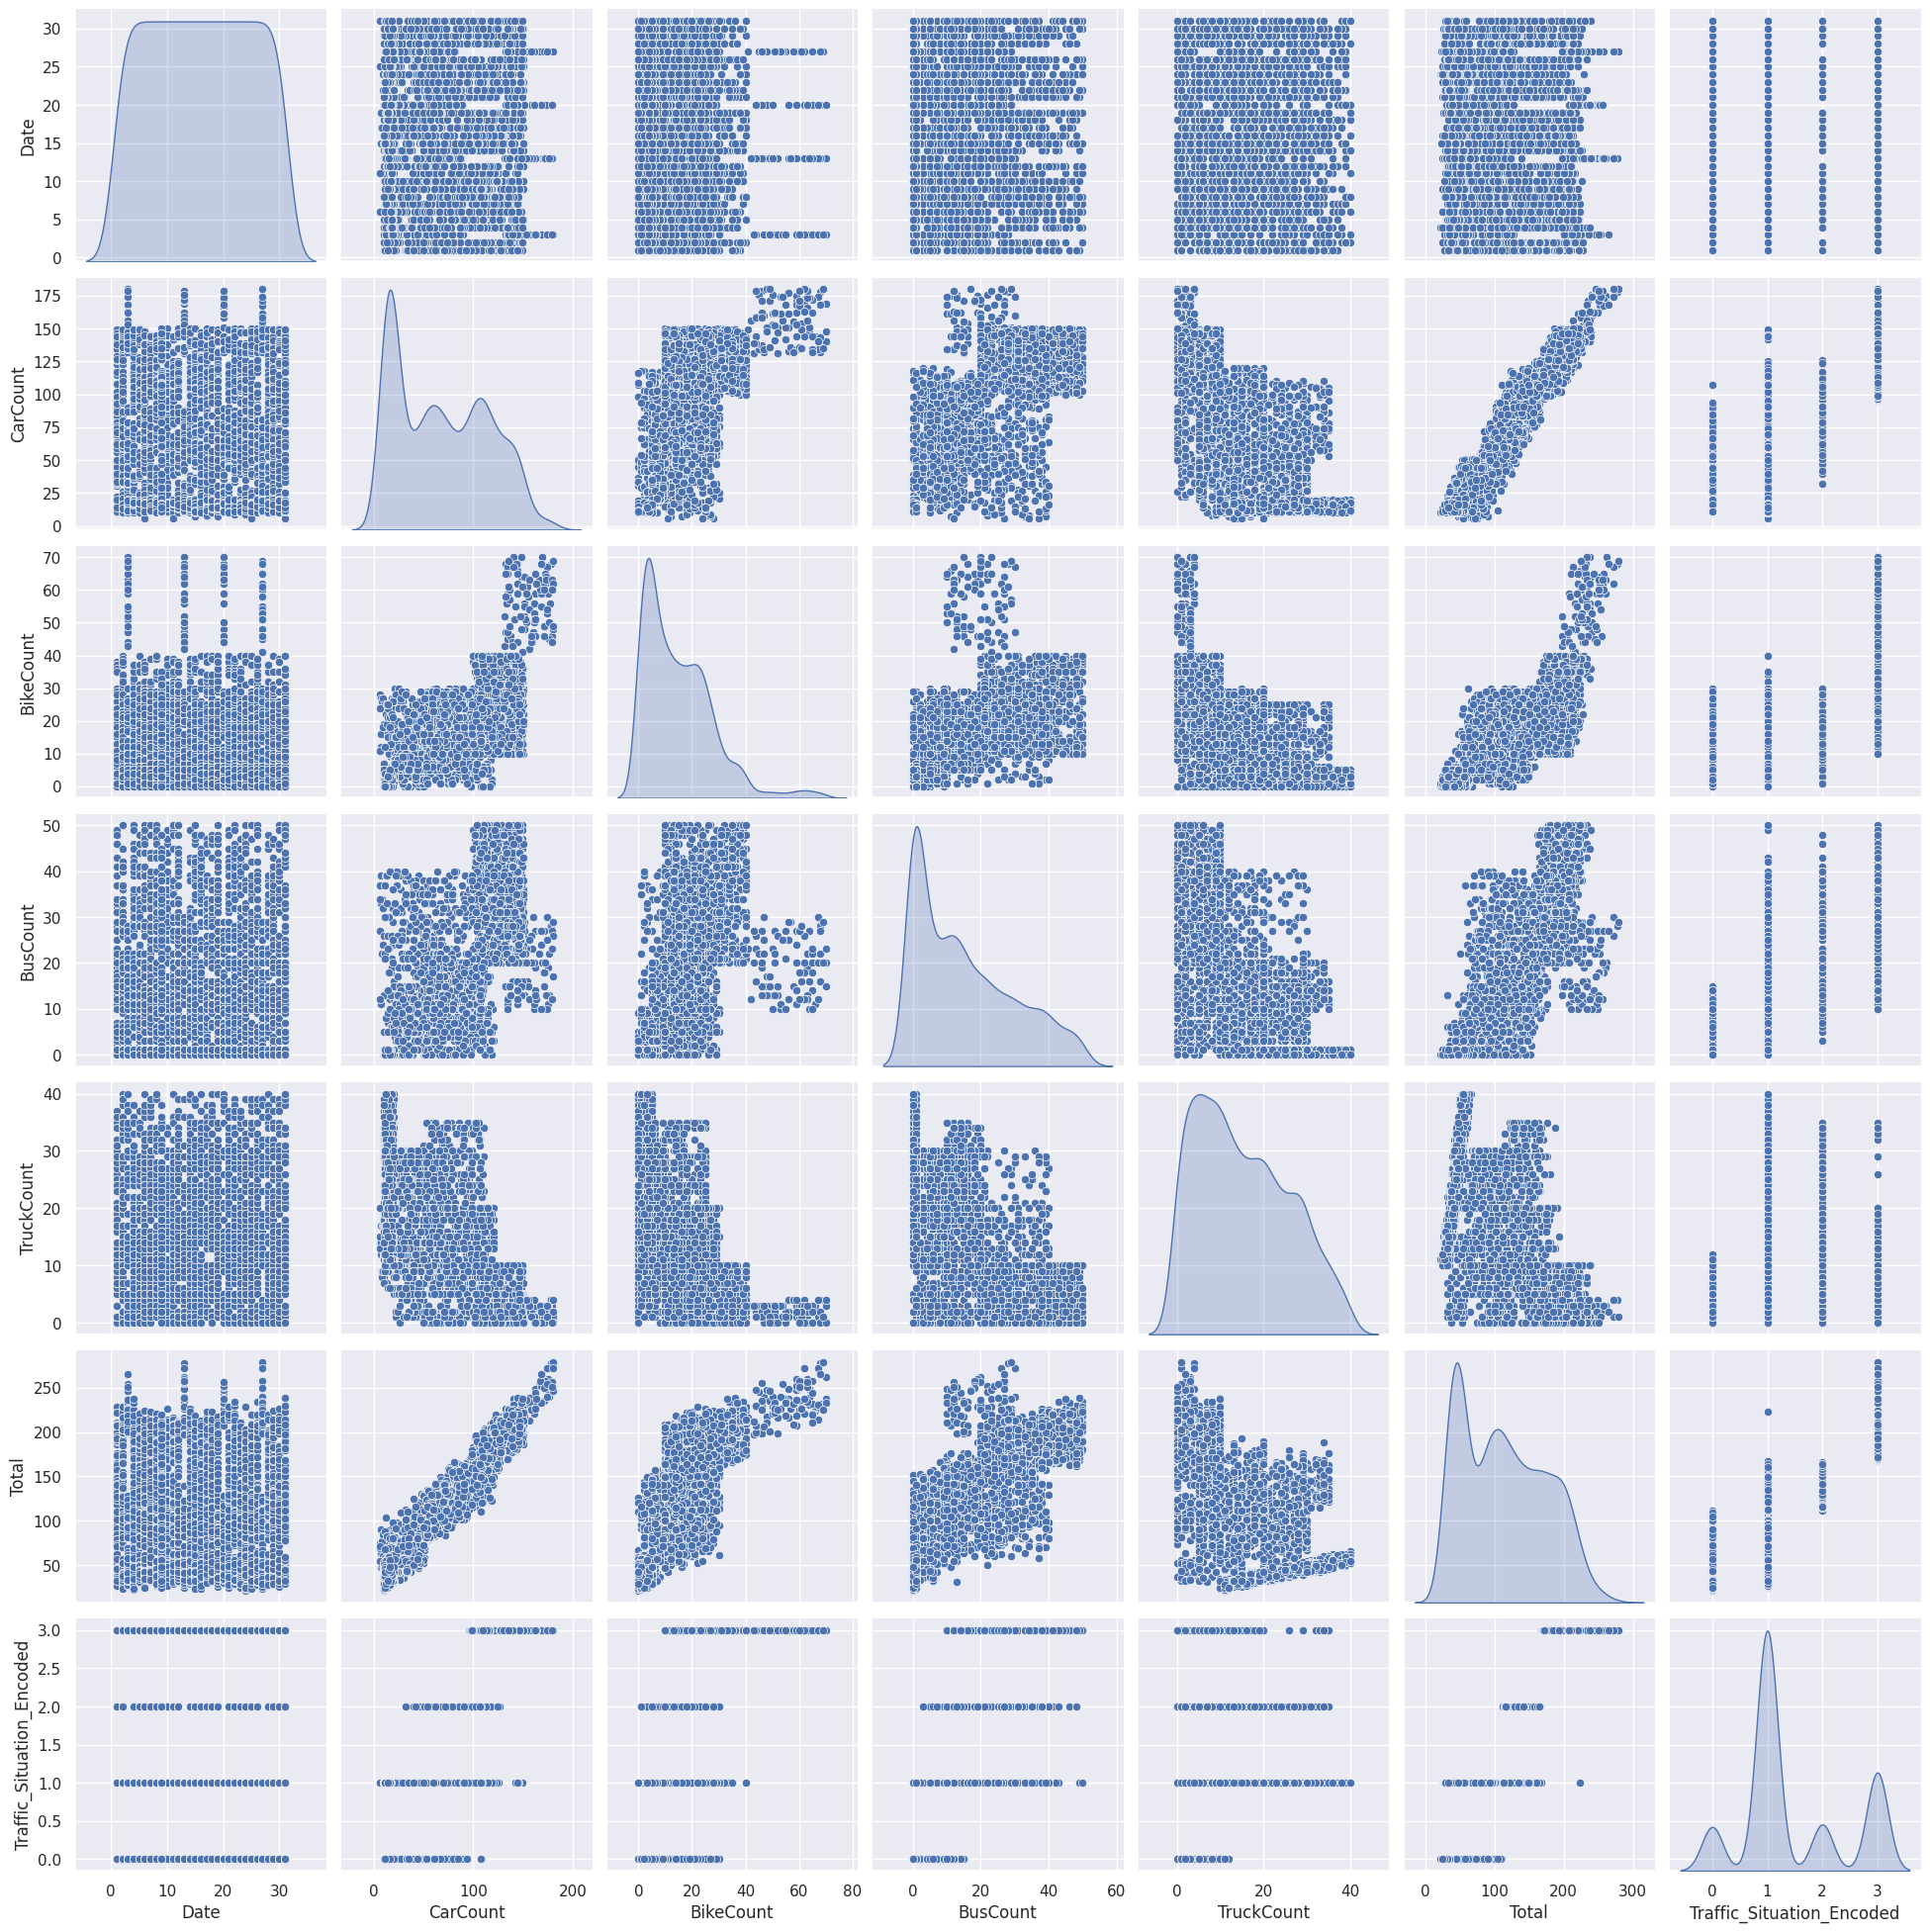

In [ ]:

#Check for multicollinearity using Scatter Matrix
scatter_matrix = sns.pairplot(data_1, diag_kind='kde', plot_kws={'alpha': 1})
scatter_matrix.fig.set_size_inches(20, 20)
plt.show()

--> from the scatter matrix we note that their linear patteren between (car count_total) , (Bikecount_total),(buscount_total)

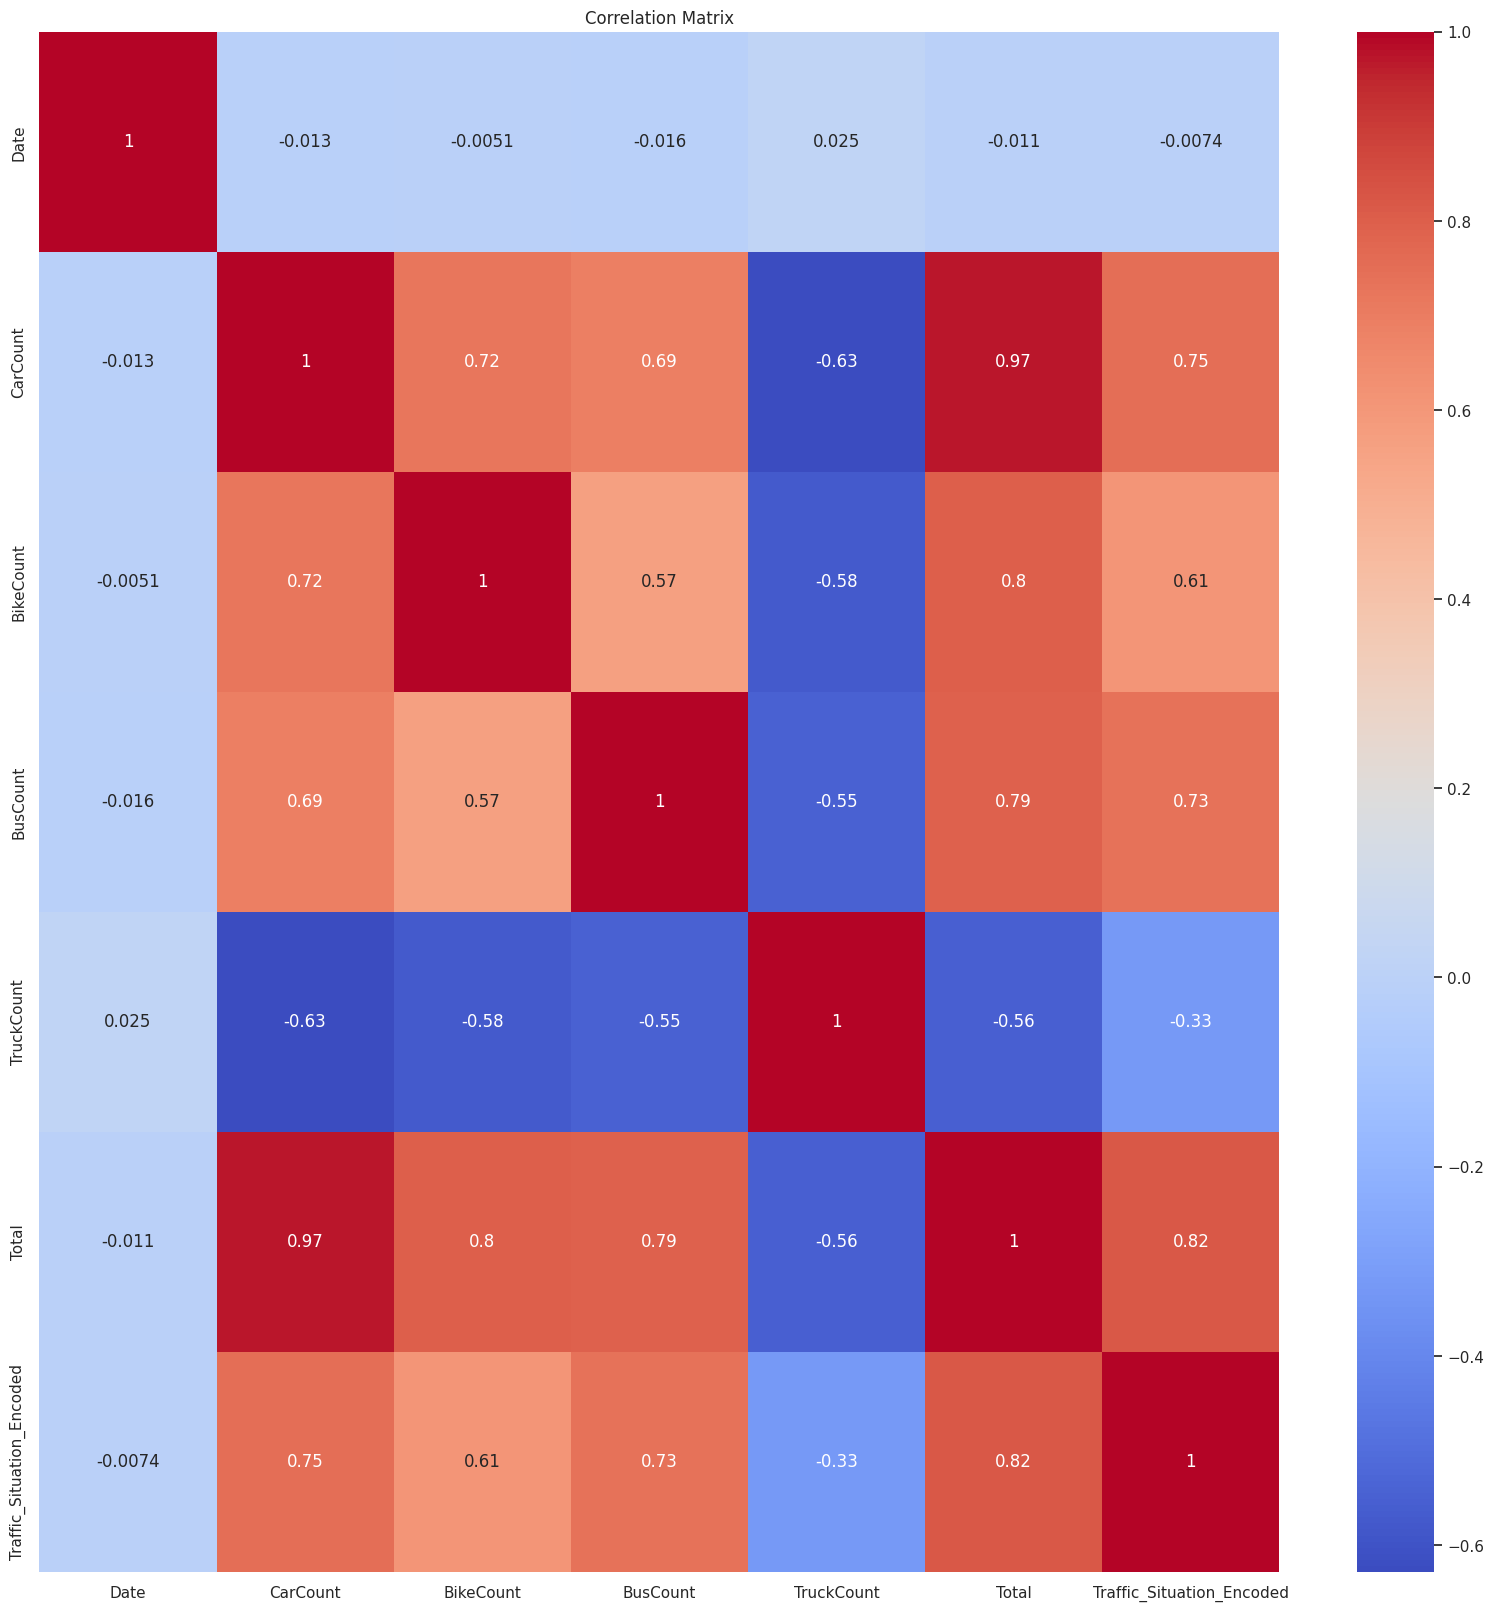

In [ ]:
# Compute the correlation matrix
corr_matrix = data_1.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Remove any non-numeric columns and missing_values target coulmn
X = data.select_dtypes(include=[np.number]).dropna()
X = X.drop("Traffic_Situation_Encoded", axis=1)

# Compute the VIF for each independent variable
vif = pd.DataFrame()
vif["variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

     variable       VIF
0        Date  3.442584
1    CarCount       inf
2   BikeCount       inf
3    BusCount       inf
4  TruckCount       inf
5       Total       inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
# Select variables with high VIF
high_vif_variables = vif[vif["VIF"] > 10]["variable"]
print(high_vif_variables)

1      CarCount
2     BikeCount
3      BusCount
4    TruckCount
5         Total
Name: variable, dtype: object


--> from VIF we note that  CarCount , BikeCount, BusCount, TruckCount, Total having multicollinearity





# EDA For Numerical Variables

## Univariate Analysis

In [ ]:
 # Drop columns that are not included in the analysis or modeling
numeric_df= data_1.drop(['Time', 'Date','Day of the week','Traffic_Situation_Encoded'], axis=1)

# Storing 'LeaveOrNot' column in another variable
id = data_1['Traffic_Situation_Encoded']

In [ ]:
# view summary statistics in numerical variables
round(numeric_df.describe(),2)

,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.00,2976.00,2976.00,2976.00,2976.00
mean,68.70,14.92,15.28,15.32,114.22
std,45.85,12.85,14.34,10.60,60.19
min,6.00,0.00,0.00,0.00,21.00
25%,19.00,5.00,1.00,6.00,55.00
50%,64.00,12.00,12.00,14.00,109.00
75%,107.00,22.00,25.00,23.00,164.00
max,180.00,70.00,50.00,40.00,279.00


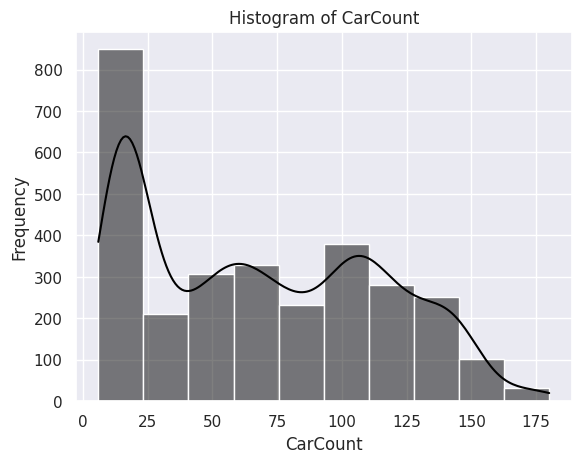

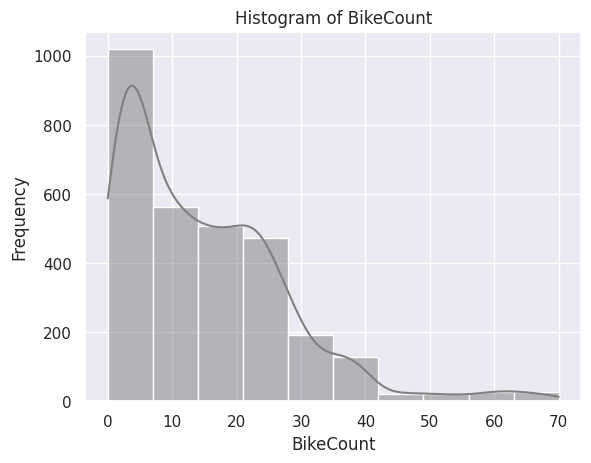

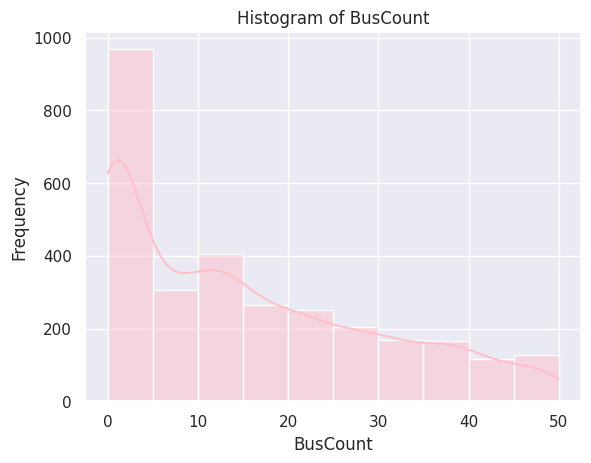

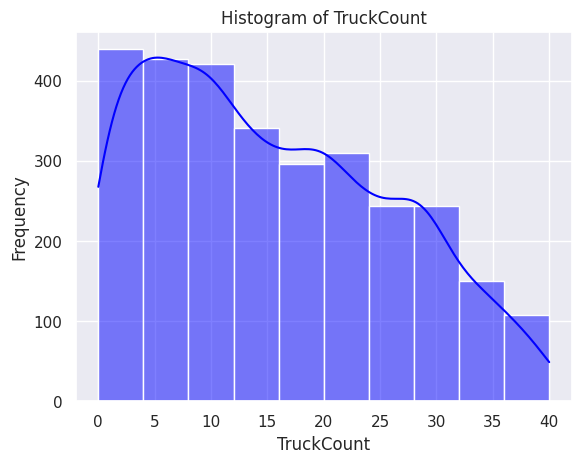

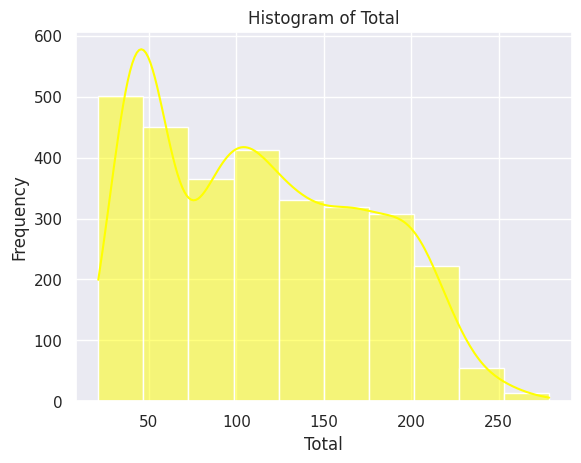

In [ ]:

colors = ['black', 'gray', 'pink', 'blue', 'yellow']

for i, column in enumerate(numeric_df.columns):
    plt.figure()
    sns.histplot(numeric_df[column], bins=10, kde=True, color=colors[i % len(colors)])
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


--> bickcount and buscount are skewed

## checking for outliers using Box plot

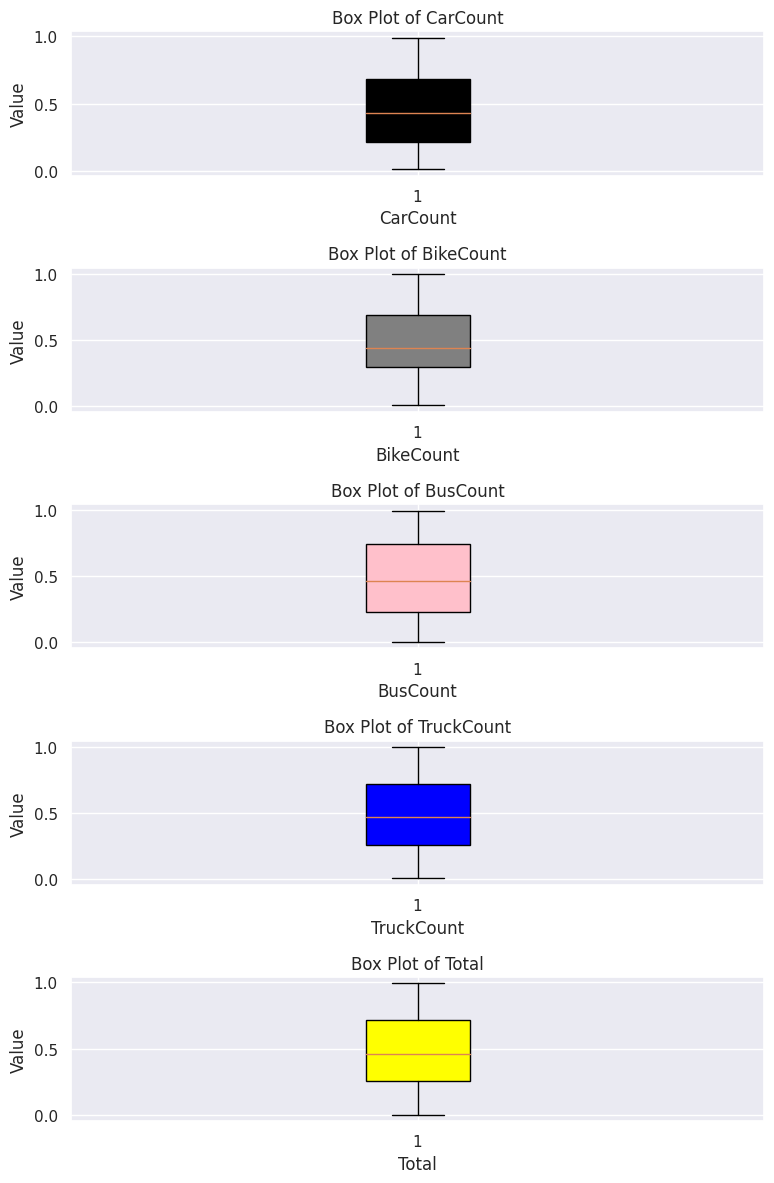

In [ ]:
# Example DataFrame (Replace this with your actual DataFrame)
numeric_df = pd.DataFrame(np.random.rand(100, 5), columns=['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total'])

colors = ['black', 'gray', 'pink', 'blue', 'yellow']

plt.figure(figsize=(8, 12))  # Adjust figure size as needed
for i, column in enumerate(numeric_df.columns):
    plt.subplot(len(numeric_df.columns), 1, i+1)
    plt.boxplot(numeric_df[column], patch_artist=True, boxprops=dict(facecolor=colors[i]))
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()




--> thair aren't outliers

## Anova Test

### (Traffic Situation , CarCount)

In [ ]:
# Assuming your data is in a DataFrame called 'data'
numeric_feature = data_1['CarCount']
categorical_target = data_1['Traffic_Situation_Encoded']

# Perform ANOVA test
fvalue, pvalue = stats.f_oneway(numeric_feature, categorical_target)

# Check the significance
alpha = 0.05  # Set the significance level
if pvalue < alpha:
    print("The numeric feature is significantly associated with the categorical target.")
else:
    print("The numeric feature is not significantly associated with the categorical target.")

The numeric feature is significantly associated with the categorical target.


### (Traffic Situation , BikeCount)

In [ ]:

# Assuming your data is in a DataFrame called 'data'
numeric_feature = data_1['BikeCount']
categorical_target = data_1['Traffic_Situation_Encoded']

# Perform ANOVA test
fvalue, pvalue = stats.f_oneway(numeric_feature, categorical_target)

# Check the significance
alpha = 0.05  # Set the significance level
if pvalue < alpha:
    print("The numeric feature is significantly associated with the categorical target.")
else:
    print("The numeric feature is not significantly associated with the categorical target.")

The numeric feature is significantly associated with the categorical target.


### (Traffic Situation , BusCount)

In [ ]:
# Assuming your data is in a DataFrame called 'data'
numeric_feature = data_1['BusCount']
categorical_target = data_1['Traffic_Situation_Encoded']

# Perform ANOVA test
fvalue, pvalue = stats.f_oneway(numeric_feature, categorical_target)

# Check the significance
alpha = 0.05  # Set the significance level
if pvalue < alpha:
    print("The numeric feature is significantly associated with the categorical target.")
else:
    print("The numeric feature is not significantly associated with the categorical target.")

The numeric feature is significantly associated with the categorical target.


### (Traffic Situation , TruckCount)

In [ ]:

# Assuming your data is in a DataFrame called 'data'
numeric_feature = data_1['TruckCount']
categorical_target = data_1['Traffic_Situation_Encoded']

# Perform ANOVA test
fvalue, pvalue = stats.f_oneway(numeric_feature, categorical_target)

# Check the significance
alpha = 0.05  # Set the significance level
if pvalue < alpha:
    print("The numeric feature is significantly associated with the categorical target.")
else:
    print("The numeric feature is not significantly associated with the categorical target.")

The numeric feature is significantly associated with the categorical target.


### (Traffic Situation , Total)

In [ ]:
# Assuming your data is in a DataFrame called 'data'
numeric_feature = data_1['Total']
categorical_target = data_1['Traffic_Situation_Encoded']

# Perform ANOVA test
fvalue, pvalue = stats.f_oneway(numeric_feature, categorical_target)

# Check the significance
alpha = 0.05  # Set the significance level
if pvalue < alpha:
    print("The numeric feature is significantly associated with the categorical target.")
else:
    print("The numeric feature is not significantly associated with the categorical target.")

The numeric feature is significantly associated with the categorical target.


All numircal features are significantly associated and important

In [ ]:
data_1.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic_Situation_Encoded
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,0
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,0
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,0
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,0
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,1


# EDA for Time and Date data

In [ ]:
data['Time'] = pd.to_datetime(data['Time'])
data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
# Extracting hour, minute, and second
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute
data['Second'] = data['Time'].dt.second
data['Date'] = data['Date'].dt.day


In [ ]:
# Basic statistics
print(data[['Date', 'Hour', 'Minute','Second', 'Day of the week']].describe())

         Date        Hour       Minute  Second
count  2976.0  2976.00000  2976.000000  2976.0
mean      1.0    11.50000    22.500000     0.0
std       0.0     6.92335    16.773328     0.0
min       1.0     0.00000     0.000000     0.0
25%       1.0     5.75000    11.250000     0.0
50%       1.0    11.50000    22.500000     0.0
75%       1.0    17.25000    33.750000     0.0
max       1.0    23.00000    45.000000     0.0


In [ ]:
print("Traffic Situation ", data['Traffic Situation'].unique())

Traffic Situation  ['low' 'normal' 'heavy' 'high']


<Figure size 1000x600 with 0 Axes>

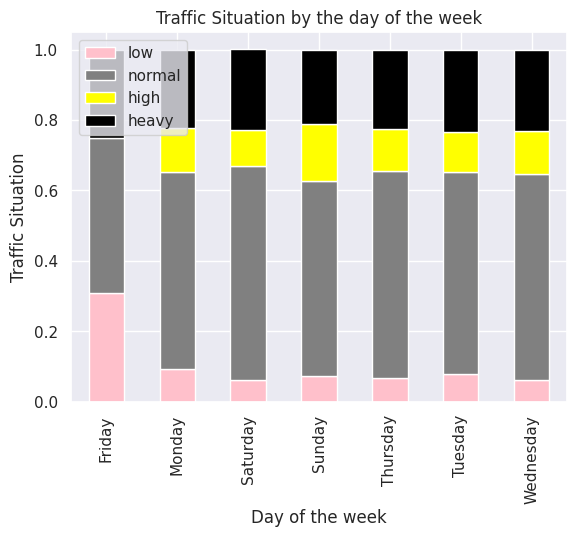

In [ ]:
# Group the Day of the week and Traffic Situation and calculate the counts
grouped_data_1 = data_1.groupby(['Day of the week', 'Traffic_Situation_Encoded']).size().unstack()

# Calculate the proportion of employees leaving and staying in each year
grouped_data_1['Total'] = grouped_data_1.sum(axis=1)
grouped_data_1['low traffic'] = grouped_data_1[0] / grouped_data_1['Total']
grouped_data_1['normal traffic'] = grouped_data_1[1] / grouped_data_1['Total']
grouped_data_1['high traffic'] = grouped_data_1[2] / grouped_data_1['Total']
grouped_data_1['heavy traffic'] = grouped_data_1[3] / grouped_data_1['Total']



# Plot the stacked bar plot with custom colors
plt.figure(figsize=(10, 6))
grouped_data_1[['low traffic','normal traffic','high traffic','heavy traffic']].plot(kind='bar', stacked=True, color=['pink', 'gray','yellow','black'])
plt.xlabel('Day of the week')
plt.ylabel('Traffic Situation')
plt.title('Traffic Situation by the day of the week')
plt.legend(['low', 'normal','high','heavy'])
plt.show()


### Anova Test (Date,Traffic_Situation_Encoded)

In [ ]:
# Assuming your data is in a DataFrame called 'data'
Date_feature = data_1['Date']
categorical_target = data_1['Traffic_Situation_Encoded']

# Perform ANOVA test
fvalue, pvalue = stats.f_oneway(Date_feature, categorical_target)

# Check the significance
alpha = 0.05  # Set the significance level
if pvalue < alpha:
    print("The Date feature is significantly associated with the categorical target.")
else:
    print("The Date feature is not significantly associated with the categorical target.")

The Date feature is significantly associated with the categorical target.




### Anova Test (Time,Traffic_Situation_Encoded)

In [ ]:
# Assuming 'Time' is your time variable, and 'traffic_situation' is the target variable
data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = data['Time'].dt.hour

# Binning into morning, afternoon, and evening
data['Time_of_day'] = pd.cut(data['Hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Perform ANOVA
f_statistic, p_value = f_oneway(*[group['Traffic_Situation_Encoded'] for name, group in data.groupby('Time_of_day')])

print(f"F-statistic: {f_statistic}\nP-value: {p_value}")

if pvalue < alpha:
    print("The Date feature is significantly associated with the categorical target.")
else:
    print("The Date feature is not significantly associated with the categorical target.")



F-statistic: 170.18579179164598
P-value: 1.7559382711957617e-101
The Date feature is significantly associated with the categorical target.


### Chi_Squre_Test(Day of the week,Traffic_Situation_Encoded)

In [ ]:
# Create a contingency table of the predictor variable and the target variable
contingency_table = pd.crosstab(data_1['Day of the week'], data_1['Traffic_Situation_Encoded'])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("contingency_table:")
print( contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("The  feature is significantly associated with the categorical target.")
else:
    print("The  feature is not significantly associated with the categorical target.")

contingency_table:
Traffic_Situation_Encoded    0    1   2    3
Day of the week                             
Friday                     118  170   0   96
Monday                      36  214  48   86
Saturday                    23  234  39   88
Sunday                      28  213  62   81
Thursday                    32  282  58  108
Tuesday                     37  276  55  112
Wednesday                   30  280  59  111
Chi-square statistic: 253.2601288276512
P-value: 1.7706611285239546e-43
Degrees of freedom: 18
Expected frequencies:
[[ 39.22580645 215.35483871  41.41935484  88.        ]
 [ 39.22580645 215.35483871  41.41935484  88.        ]
 [ 39.22580645 215.35483871  41.41935484  88.        ]
 [ 39.22580645 215.35483871  41.41935484  88.        ]
 [ 49.03225806 269.19354839  51.77419355 110.        ]
 [ 49.03225806 269.19354839  51.77419355 110.        ]
 [ 49.03225806 269.19354839  51.77419355 110.        ]]
The  feature is significantly associated with the categorical target.


# Data Preprossing

## Encodding categorical data

In [ ]:
# Assuming 'time' is the column you want to drop
data_1 = data_1.drop('Time', axis=1)

# One-hot encoding the remaining categorical columns
data_1 = pd.get_dummies(data_1, drop_first=True)
data_1.head()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic_Situation_Encoded,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
0,10,31,0,4,4,39,0,0,0,0,0,1,0
1,10,49,0,3,3,55,0,0,0,0,0,1,0
2,10,46,0,3,6,55,0,0,0,0,0,1,0
3,10,51,0,2,5,58,0,0,0,0,0,1,0
4,10,57,6,15,16,94,1,0,0,0,0,1,0


## Handling multicollinearity

In [ ]:

# Create a subset of the data with the high VIF variables
subset_data = data_1[high_vif_variables]

# Standardize the variables
scaler = StandardScaler()
subset_data_1_scaled = scaler.fit_transform(subset_data)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(subset_data_1_scaled)

# Select the number of components to retain
# You can use a threshold or analyze the scree plot to make this decision

# For example, let's say you want to retain components that explain 90% of the variance
total_variance = 0
num_components = 0
for variance in pca.explained_variance_ratio_:
    total_variance += variance
    num_components += 1
    if total_variance >= 0.9:
        break
# Transform the data using the selected components
transformed_data = principal_components[:, :num_components]

#Drop the original features from the DataFrame
data_1 = data_1.drop(columns=high_vif_variables)

# Convert the NumPy array to a DataFrame
transformed_data = pd.DataFrame(transformed_data)

# Concatenate the DataFrame with the transformed data
data_1 = pd.concat([data_1, transformed_data], axis=1)




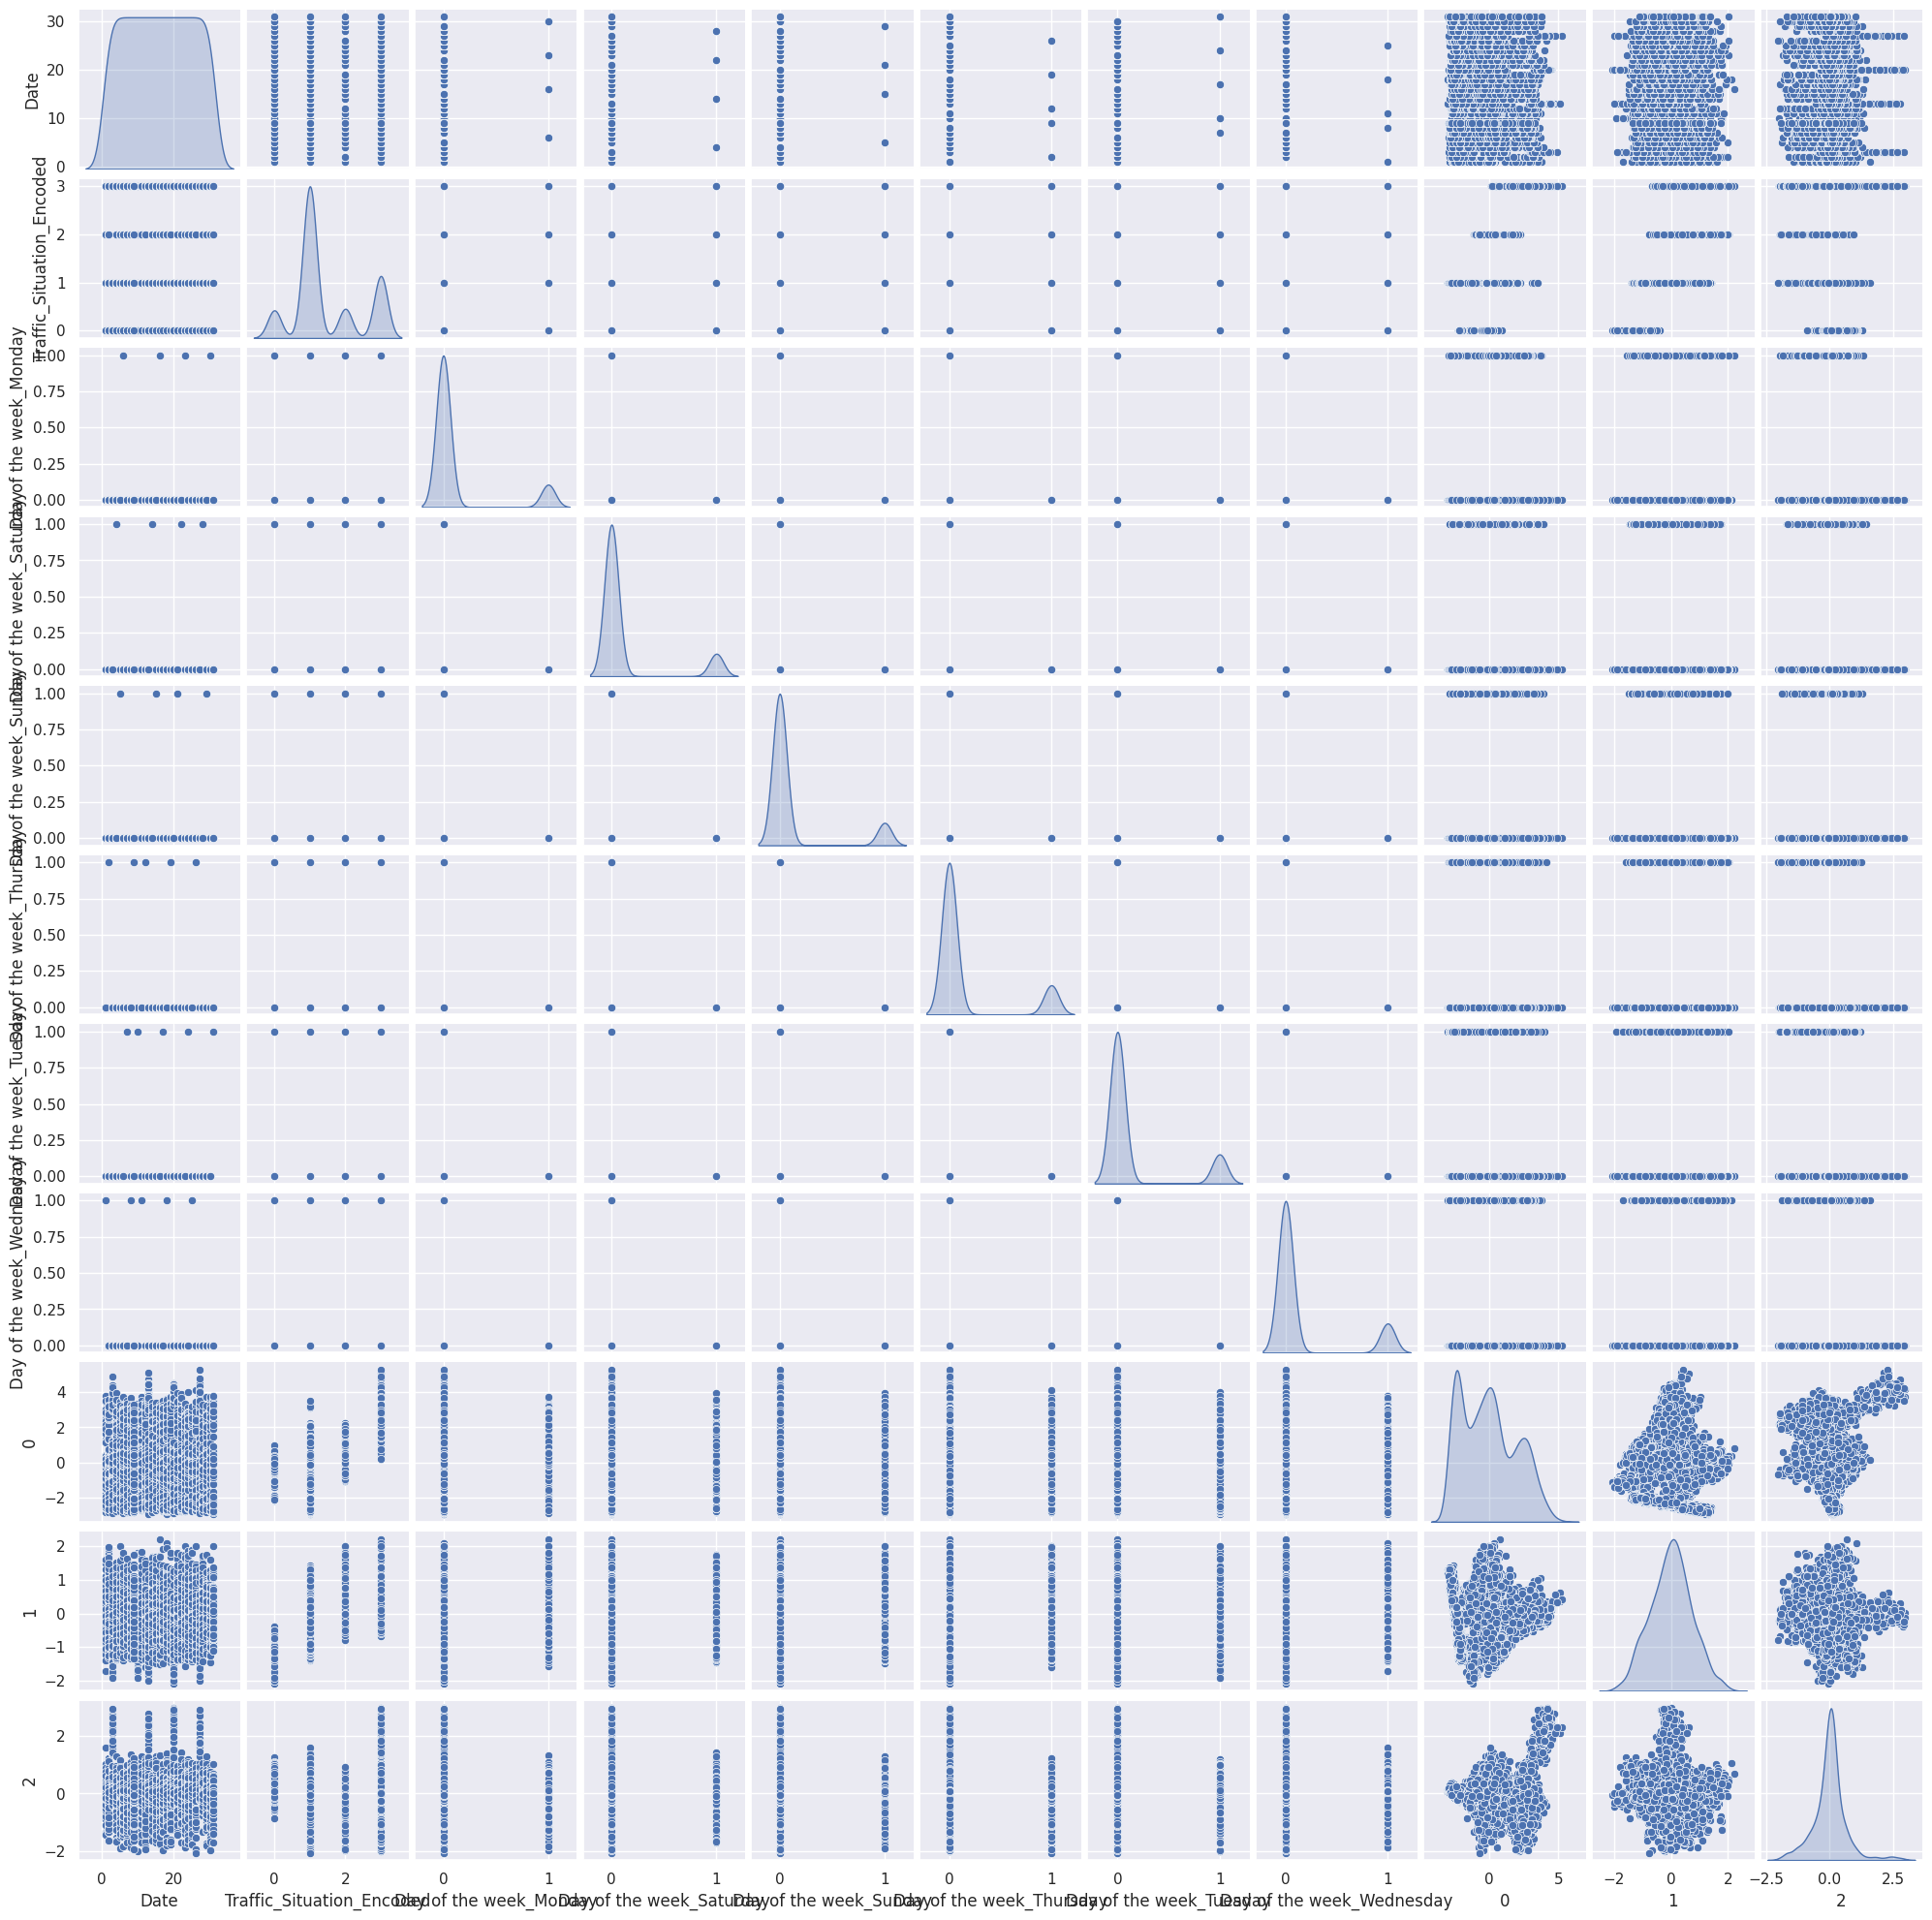

In [ ]:
scatter_matrix = sns.pairplot(data_1, diag_kind='kde', plot_kws={'alpha': 1})
scatter_matrix.fig.set_size_inches(20, 20)
plt.show()

# Data Modling

## Data Preparation

In [ ]:
# Data Separation as X and Y
y= data_1['Traffic_Situation_Encoded']
x= data_1.drop('Traffic_Situation_Encoded',axis=1)

In [ ]:
# Convert feature names to strings
x.columns = x.columns.astype(str)

###Handling the ubalanced data

In [ ]:
# Assuming 'x' are your features and 'y' is the target variable
# Replace 'x' and 'y' with your actual feature and target variable

# Print the class distribution before oversampling
print("Class distribution before oversampling:")
print(y.value_counts())


# Convert feature names to strings
x.columns = x.columns.astype(str)

# Set the desired number of samples for each class
desired_samples = 300  # Adjust this number based on your requirements

# Apply RandomOverSampler for oversampling
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)  # or 'minority'

# Oversample the data
x, y = ros.fit_resample(x, y)

# Convert the resampled data back to a DataFrame (if necessary)
x = pd.DataFrame(x)
y = pd.Series(y)

# Print the class distribution after oversampling
print("\nClass distribution after oversampling:")
print(y.value_counts())



Class distribution before oversampling:
1    1669
3     682
2     321
0     304
Name: Traffic_Situation_Encoded, dtype: int64

Class distribution after oversampling:
0    1669
1    1669
3    1669
2    1669
Name: Traffic_Situation_Encoded, dtype: int64


i choose oversampling because , while useing the undersampling also making overfitting although oversampling give use better accurcy

## split training set and test set

In [ ]:

#split the data in training set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## scale the data

In [ ]:


# Assuming x_train and x_test are NumPy arrays
cols = list(range(x_train.shape[1]))  # Assuming x_train has numerical column indices

scaler = StandardScaler()

# Fit and transform on training data
x_train = scaler.fit_transform(x_train)

# Transform on test data
x_test = scaler.transform(x_test)

# Convert the standardized NumPy arrays back to DataFrames
x_train = pd.DataFrame(x_train, columns=cols)
x_test = pd.DataFrame(x_test, columns=cols)



## Feature Scaling

### increasing the traing set size

In [ ]:
# Assuming 'X_train' is your feature matrix and 'y_train' is your target variable
original_train_shape = x_train.shape

df = pd.concat([x_train, y_train], axis=1)
df_bootstrapped = resample(df, replace=True, n_samples=len(df)*2, random_state=42)
x = df_bootstrapped.iloc[:, :-1]
y = df_bootstrapped.iloc[:, -1]

# Print the shape of the training set before and after bootstrapping
print("Original Training Set Shape:", original_train_shape)
print("Bootstrapped Training Set Shape:", x.shape)


Original Training Set Shape: (5340, 10)
Bootstrapped Training Set Shape: (12824, 10)


i increas the size of train set to handlling the overfitting

In [ ]:
print('Data:    ',data.shape)
print('----------------')
print('x train: ',x_train.shape)
print('y train: ',y_train.shape)
print('----------------')
print('x test:  ',x_test.shape)
print('y test:  ',y_test.shape)

Data:     (2976, 14)
----------------
x train:  (5340, 10)
y train:  (5340,)
----------------
x test:   (1336, 10)
y test:   (1336,)


In [ ]:
print(y.value_counts())

0.0    2765
2.0    2670
1.0    2655
3.0    2641
Name: Traffic_Situation_Encoded, dtype: int64


## Applying the KNN model

In [ ]:


# Create a KNeighborsClassifier instance
knn_model = KNeighborsClassifier(n_neighbors=3,p=2,weights='uniform')

#cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn_model, x_train, y_train, cv=5)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Train the model
knn_model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_test = knn_model.predict(x_test)
y_pred_train= knn_model.predict(x_train)

# Calculate F1 score on the test set
f1_test = f1_score(y_test, y_pred_test, average='weighted')
print("F1 Score on Test Set:", f1_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
print("F1 Score on train Set:", f1_train)

#calculate_accurcy
# Evaluate on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)

# Evaluate on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

F1 Score on Test Set: 0.9452320636789758
F1 Score on train Set: 0.9704262194496327
Training Accuracy: 0.9707865168539326
Test Accuracy: 0.9461077844311377


In [ ]:
# Classification Report
class_report_test = classification_report(y_test, y_pred_test)

class_report_train = classification_report(y_train,y_pred_train)

print("\nClassification Report_test set:")
print(class_report_test)


print("\nClassification Report_train set:")
print(class_report_train)


Classification Report_test set:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       328
           1       0.97      0.84      0.90       326
           2       0.93      0.97      0.95       348
           3       0.97      0.96      0.97       334

    accuracy                           0.95      1336
   macro avg       0.95      0.95      0.94      1336
weighted avg       0.95      0.95      0.95      1336


Classification Report_train set:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1341
           1       0.99      0.90      0.94      1343
           2       0.95      1.00      0.97      1321
           3       0.99      0.99      0.99      1335

    accuracy                           0.97      5340
   macro avg       0.97      0.97      0.97      5340
weighted avg       0.97      0.97      0.97      5340



In [ ]:
# Save the model to a file
with open('knn_model.pkl', 'wb') as model_file:
    pickle.dump(knn_model, model_file)
# Load the model from the file
with open('knn_model.pkl', 'rb') as model_file:
    loaded_knn_model = pickle.load(model_file)
# to use the pickled mosel , Assuming X_test is a new set of features
predictions = loaded_knn_model.predict(x_test)

### KNN using (Tune Hyperparameters) gridsearch , f1, cros vallidation

In [ ]:
# Define the KNN model
knn_model = KNeighborsClassifier()

# fit the model to the training set
knn_model.fit(x_train, y_train)

# Define the parameter grid
param_grid = {
    'n_neighbors': np.arange(1, 3),  # Adjust the range based on your problem
    'weights': ['distance', 'uniform'],
    'p': [1, 2],
}

# Use F1 score as the scoring metric for GridSearchCV
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, scoring=f1_scorer, cv=5)
grid_search.fit(x_train, y_train)  # Use X_train and y_train

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5, scoring=f1_scorer)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# Evaluate the model on the test set and train set using the best parameters
best_knn_model = grid_search.best_estimator_
y_pred_test = best_knn_model.predict(x_test)
y_pred_train = best_knn_model.predict(x_train)



# Calculate F1 score on the test set and train set
f1_test = f1_score(y_test, y_pred_test, average='weighted')
print("F1 Score on Test Set:", f1_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
print("F1 Score on Train Set:", f1_train)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Best Parameters: {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
Cross-Validation Scores: [0.95378769 0.9565965  0.9572349  0.96504008 0.95433195]
Average Cross-Validation Score: 0.9573982243577351
F1 Score on Test Set: 0.9696912900063409
F1 Score on Train Set: 1.0
Training Accuracy: 1.0
Test Accuracy: 0.9700598802395209


In [ ]:
# Classification Report
class_report_test = classification_report(y_test, y_pred_test)

class_report_train = classification_report(y_train,y_pred_train)

print("\nClassification Report_test set:")
print(class_report_test)


print("\nClassification Report_train set:")
print(class_report_train)



Classification Report_test set:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       328
           1       0.99      0.90      0.94       326
           2       0.96      0.99      0.98       348
           3       0.98      0.99      0.98       334

    accuracy                           0.97      1336
   macro avg       0.97      0.97      0.97      1336
weighted avg       0.97      0.97      0.97      1336


Classification Report_train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1341
           1       1.00      1.00      1.00      1343
           2       1.00      1.00      1.00      1321
           3       1.00      1.00      1.00      1335

    accuracy                           1.00      5340
   macro avg       1.00      1.00      1.00      5340
weighted avg       1.00      1.00      1.00      5340



## Applying the Decision Tree Model

In [ ]:
# Create a DecisionTreeClassifier instance
dt_model = DecisionTreeClassifier(random_state=42,max_depth=5,min_samples_split=5, min_samples_leaf=2,max_features=0.8,ccp_alpha=0.01,)

# Train the model
dt_model.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, max_features=0.8,
                       min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [ ]:
y_pred_test = dt_model.predict(x_test)
y_pred_train= dt_model.predict(x_train)

# Calculate F1 score on the test set
f1_test = f1_score(y_test, y_pred_test, average='weighted')
print("F1 Score on Test Set:", f1_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
print("F1 Score on train Set:", f1_train)

#calculate_accurcy
# Evaluate on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)

# Evaluate on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

F1 Score on Test Set: 0.9091174340125665
F1 Score on train Set: 0.906216813077617
Training Accuracy: 0.9063670411985019
Test Accuracy: 0.9094311377245509


In [ ]:
# Classification Report
class_report_test = classification_report(y_test, y_pred_test)

class_report_train = classification_report(y_train,y_pred_train)

print("\nClassification Report_test set:")
print(class_report_test)


print("\nClassification Report_train set:")
print(class_report_train)


Classification Report_test set:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       328
           1       0.89      0.87      0.88       326
           2       0.90      0.87      0.88       348
           3       0.92      0.94      0.93       334

    accuracy                           0.91      1336
   macro avg       0.91      0.91      0.91      1336
weighted avg       0.91      0.91      0.91      1336


Classification Report_train set:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1341
           1       0.89      0.89      0.89      1343
           2       0.86      0.85      0.86      1321
           3       0.92      0.90      0.91      1335

    accuracy                           0.91      5340
   macro avg       0.91      0.91      0.91      5340
weighted avg       0.91      0.91      0.91      5340



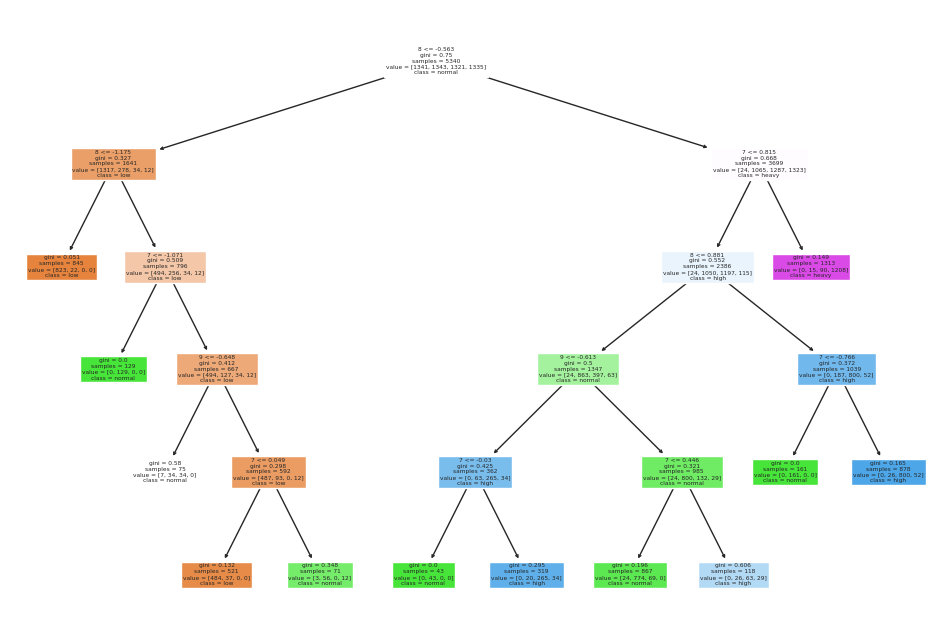

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=x.columns, class_names=['low', 'normal','high','heavy'])
plt.show()


#### pickling the model

In [ ]:
# Save the model to a file
with open('dt_model.pkl', 'wb') as model_file:
    pickle.dump(dt_model, model_file)
# Load the model from the file
with open('dt_model.pkl', 'rb') as model_file:
    loaded_dt_model = pickle.load(model_file)
# to use the pickled mosel , Assuming X_test is a new set of features
predictions = loaded_dt_model.predict(x_test)

### decission tree using (Tune Hyperparameters) gridsearch , f1, cros vallidation

In [ ]:
# Define the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 10),
    'min_samples_split': np.arange(2, 5),
    'min_samples_leaf': np.arange(1,5)
}

# Use F1 score as the scoring metric for GridSearchCV
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, scoring=f1_scorer, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5, scoring=f1_scorer)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

#calculate_(f1_score)
# Evaluate the model on the test set and train test using the best parameters
best_dt_model = grid_search.best_estimator_
y_pred_test = best_dt_model.predict(x_test)
y_pred_train= best_dt_model.predict(x_train)

# Calculate F1 score on the test set
f1_test = f1_score(y_test, y_pred_test, average='weighted')
print("F1 Score on Test Set:", f1_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
print("F1 Score on Test Set:", f1_train)

#calculate_accurcy
# Evaluate on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)

# Evaluate on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3}
Cross-Validation Scores: [0.95294177 0.95300654 0.95761236 0.9662965  0.95261547]
Average Cross-Validation Score: 0.9564945286261413
F1 Score on Test Set: 0.9705635226040675
F1 Score on Test Set: 0.9788116833565784
Training Accuracy: 0.9788389513108614
Test Accuracy: 0.9708083832335329


In [ ]:
# Classification Report
class_report_test = classification_report(y_test, y_pred_test)

class_report_train = classification_report(y_train,y_pred_train)

print("\nClassification Report_test set:")
print(class_report_test)


print("\nClassification Report_train set:")
print(class_report_train)


Classification Report_test set:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       328
           1       0.99      0.91      0.95       326
           2       0.96      0.99      0.97       348
           3       0.98      0.98      0.98       334

    accuracy                           0.97      1336
   macro avg       0.97      0.97      0.97      1336
weighted avg       0.97      0.97      0.97      1336


Classification Report_train set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1341
           1       1.00      0.94      0.97      1343
           2       0.95      0.99      0.97      1321
           3       1.00      0.98      0.99      1335

    accuracy                           0.98      5340
   macro avg       0.98      0.98      0.98      5340
weighted avg       0.98      0.98      0.98      5340



## Applying the Random Forest Model

In [ ]:

# Create a RandomForestClassifier instance
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5,min_samples_split=5,min_samples_leaf=2,max_features=0.8,oob_score=True ,random_state=42)

# Train the model
rf_model.fit(x_train, y_train)


RandomForestClassifier(max_depth=5, max_features=0.8, min_samples_leaf=2,
                       min_samples_split=5, oob_score=True, random_state=42)

In [ ]:
y_pred_test = rf_model.predict(x_test)
y_pred_train= rf_model.predict(x_train)

# Calculate F1 score on the test set
f1_test = f1_score(y_test, y_pred_test, average='weighted')
print("F1 Score on Test Set:", f1_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
print("F1 Score on train Set:", f1_train)

#calculate_accurcy
# Evaluate on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)

# Evaluate on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

F1 Score on Test Set: 0.9271335746142176
F1 Score on train Set: 0.9287398754390772
Training Accuracy: 0.9286516853932584
Test Accuracy: 0.9273952095808383


In [ ]:
# Classification Report
class_report_test = classification_report(y_test, y_pred_test)

class_report_train = classification_report(y_train,y_pred_train)

print("\nClassification Report_test set:")
print(class_report_test)


print("\nClassification Report_train set:")
print(class_report_train)


Classification Report_test set:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       328
           1       0.94      0.86      0.90       326
           2       0.88      0.95      0.91       348
           3       0.95      0.93      0.94       334

    accuracy                           0.93      1336
   macro avg       0.93      0.93      0.93      1336
weighted avg       0.93      0.93      0.93      1336


Classification Report_train set:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1341
           1       0.95      0.86      0.90      1343
           2       0.85      0.97      0.91      1321
           3       0.98      0.91      0.94      1335

    accuracy                           0.93      5340
   macro avg       0.93      0.93      0.93      5340
weighted avg       0.93      0.93      0.93      5340



In [ ]:
# Save the model to a file
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)
# Load the model from the file
with open('rf_model.pkl', 'rb') as model_file:
    loaded_rf_model = pickle.load(model_file)
# to use the pickled mosel , Assuming X_test is a new set of features
predictions = loaded_rf_model.predict(x_test)

### decission tree using (Tune Hyperparameters) gridsearch , f1, cros vallidation

In [ ]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 2, 3, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['sqrt', 'auto', None],  # Added comma here
    'bootstrap': [True, False]
}

# Use F1 score as the scoring metric for GridSearchCV
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, scoring=f1_scorer, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5, scoring=f1_scorer)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# #calculate_(f1_score)
# # Evaluate the model on the test set and train test using the best parameters
best_rf_model = grid_search.best_estimator_

y_pred_test = best_rf_model.predict(x_test)
y_pred_train= best_rf_model.predict(x_train)

# Calculate F1 score on the test set
f1_test = f1_score(y_test, y_pred_test, average='weighted')
print("F1 Score on Test Set:", f1_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
print("F1 Score on train Set:", f1_train)

#calculate_accurcy
# Evaluate on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)

# Evaluate on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Cross-Validation Scores: [0.97180663 0.97837928 0.97827289 0.98876018 0.97738375]
Average Cross-Validation Score: 0.9789205472524181
F1 Score on Test Set: 0.9849543766831895
F1 Score on train Set: 1.0
Training Accuracy: 1.0
Test Accuracy: 0.9850299401197605


## Applying The Gradient Boosting Model

In [ ]:
# Create a GradientBoostingClassifier instance
gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3,min_samples_split=25, min_samples_leaf=10 ,random_state=42, subsample=0.8)

# Train the model
gb_model.fit(x_train, y_train)



GradientBoostingClassifier(min_samples_leaf=10, min_samples_split=25,
                           n_estimators=50, random_state=42, subsample=0.8)

In [ ]:
y_pred_test = gb_model.predict(x_test)
y_pred_train= gb_model.predict(x_train)

# Calculate F1 score on the test set
f1_test = f1_score(y_test, y_pred_test, average='weighted')
print("F1 Score on Test Set:", f1_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
print("F1 Score on train Set:", f1_train)

#calculate_accurcy
# Evaluate on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)

# Evaluate on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

F1 Score on Test Set: 0.9572227894228551
F1 Score on train Set: 0.9643450138159989
Training Accuracy: 0.9644194756554307
Test Accuracy: 0.9573353293413174


In [ ]:
# Classification Report
class_report_test = classification_report(y_test, y_pred_test)

class_report_train = classification_report(y_train,y_pred_train)

print("\nClassification Report_test set:")
print(class_report_test)


print("\nClassification Report_train set:")
print(class_report_train)


Classification Report_test set:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       328
           1       0.98      0.92      0.95       326
           2       0.94      0.95      0.94       348
           3       0.95      0.96      0.96       334

    accuracy                           0.96      1336
   macro avg       0.96      0.96      0.96      1336
weighted avg       0.96      0.96      0.96      1336


Classification Report_train set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1341
           1       0.98      0.93      0.95      1343
           2       0.93      0.96      0.95      1321
           3       0.97      0.97      0.97      1335

    accuracy                           0.96      5340
   macro avg       0.96      0.96      0.96      5340
weighted avg       0.96      0.96      0.96      5340



In [ ]:
# Save the model to a file
with open('gb_model.pkl', 'wb') as model_file:
    pickle.dump(gb_model, model_file)
# Load the model from the file
with open('gb_model.pkl', 'rb') as model_file:
    loaded_gb_model = pickle.load(model_file)
# to use the pickled mosel , Assuming X_test is a new set of features
predictions = loaded_gb_model.predict(x_test)

# Applying XGBoost model

In [ ]:
# Create an XGBClassifier instance
xgb_model = XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=3,min_child_weight=1,subsample=0.8,colsample_bytree=0.8, random_state=42)

# Train the model
xgb_model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_test = xgb_model.predict(x_test)
y_pred_train= xgb_model.predict(x_train)

# Calculate F1 score on the test set
f1_test = f1_score(y_test, y_pred_test, average='weighted')
print("F1 Score on Test Set:", f1_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
print("F1 Score on train Set:", f1_train)

#calculate_accurcy
# Evaluate on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)

# Evaluate on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

F1 Score on Test Set: 0.9358091930798716
F1 Score on train Set: 0.940369043508252
Training Accuracy: 0.9406367041198502
Test Accuracy: 0.936377245508982


In [ ]:
# Classification Report
class_report_test = classification_report(y_test, y_pred_test)

class_report_train = classification_report(y_train,y_pred_train)

print("\nClassification Report_test set:")
print(class_report_test)


print("\nClassification Report_train set:")
print(class_report_train)


Classification Report_test set:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       328
           1       0.97      0.86      0.91       326
           2       0.92      0.93      0.92       348
           3       0.93      0.96      0.95       334

    accuracy                           0.94      1336
   macro avg       0.94      0.94      0.94      1336
weighted avg       0.94      0.94      0.94      1336


Classification Report_train set:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1341
           1       0.97      0.88      0.92      1343
           2       0.89      0.94      0.92      1321
           3       0.96      0.94      0.95      1335

    accuracy                           0.94      5340
   macro avg       0.94      0.94      0.94      5340
weighted avg       0.94      0.94      0.94      5340



In [ ]:
# Save the model to a file
with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)
# Load the model from the file
with open('xgb_model.pkl', 'rb') as model_file:
    loaded_xgb_model = pickle.load(model_file)
# to use the pickled mosel , Assuming X_test is a new set of features
predictions = loaded_xgb_model.predict(x_test)